In [1]:
import pandas as pd
import faker
import numpy as np
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\ishan\World Athletics Data\Capstone\data_100m.csv')

In [3]:
df.head()

,Unnamed: 0,Rank,Mark,Player Name,DOB,Nat,Pos,Venue,Date
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,94.0,10.54,Jalen SAUNDERS,1992,USA,2h1,"Clovis, CA (USA)",04 JUN 2010
2,2,94.0,10.54,Jonathan DOWNARD,NaN,USA,3h1,"Clovis, CA (USA)",04 JUN 2010
3,3,94.0,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR,2f3,Bursa (TUR),05 JUN 2010
4,4,94.0,10.54,Hassan TAFTIAN,04 MAY 1993,IRI,1,Tehran (IRI),11 JUL 2010


In [4]:
df.drop(['Unnamed: 0', 'Rank', 'Pos', 'Venue', 'Date'], axis=1, inplace=True)

In [5]:
df.head()

,Mark,Player Name,DOB,Nat
0,NaN,NaN,NaN,NaN
1,10.54,Jalen SAUNDERS,1992,USA
2,10.54,Jonathan DOWNARD,NaN,USA
3,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR
4,10.54,Hassan TAFTIAN,04 MAY 1993,IRI


In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Mark,Player Name,DOB,Nat
1,10.54,Jalen SAUNDERS,1992,USA
3,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR
4,10.54,Hassan TAFTIAN,04 MAY 1993,IRI
5,10.54,Ayobani OYEBIYI,30 OCT 1992,NGR
6,10.55,Jeffery JOSEPHS,15 APR 1991,JAM


In [8]:
df['DOB'].str.len().value_counts()

DOB
11    21220
4      5468
8        20
Name: count, dtype: int64

In [9]:
df['Year'] = df['DOB'].apply(lambda x : int(x[:4]) if len(x) == 4 else int(x[-4:] if len(x) == 8 else int(x[-4:]) if len(x) == 11 else None))

In [10]:
df['Month'] = df['DOB'].apply(lambda x: pd.to_datetime(x, format='%d %b %Y', errors='coerce').month if len(x) == 11 else 0)


In [11]:
df.head()

,Mark,Player Name,DOB,Nat,Year,Month
1,10.54,Jalen SAUNDERS,1992,USA,1992,0
3,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR,1992,4
4,10.54,Hassan TAFTIAN,04 MAY 1993,IRI,1993,5
5,10.54,Ayobani OYEBIYI,30 OCT 1992,NGR,1992,10
6,10.55,Jeffery JOSEPHS,15 APR 1991,JAM,1991,4


In [12]:
current_year = dt.datetime.now().year
current_month = dt.datetime.now().month

df['Birth'] = df['Year'].astype(str) + "." + df['Month'].astype(str)
df['Birth'] = df['Birth'].astype(float)

In [13]:
current_year = dt.datetime.now().year
current_month = dt.datetime.now().month

df['Age'] = round((current_year + (current_month/12)) - df['Birth'], 1)

In [14]:
df.head()

,Mark,Player Name,DOB,Nat,Year,Month,Birth,Age
1,10.54,Jalen SAUNDERS,1992,USA,1992,0,1992.0,32.0
3,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR,1992,4,1992.4,31.6
4,10.54,Hassan TAFTIAN,04 MAY 1993,IRI,1993,5,1993.5,30.5
5,10.54,Ayobani OYEBIYI,30 OCT 1992,NGR,1992,10,1992.1,31.9
6,10.55,Jeffery JOSEPHS,15 APR 1991,JAM,1991,4,1991.4,32.6


In [15]:
df['Gender'] = np.random.choice(['M', 'F'], size=len(df))


In [16]:
df.head()

,Mark,Player Name,DOB,Nat,Year,Month,Birth,Age,Gender
1,10.54,Jalen SAUNDERS,1992,USA,1992,0,1992.0,32.0,M
3,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR,1992,4,1992.4,31.6,M
4,10.54,Hassan TAFTIAN,04 MAY 1993,IRI,1993,5,1993.5,30.5,F
5,10.54,Ayobani OYEBIYI,30 OCT 1992,NGR,1992,10,1992.1,31.9,M
6,10.55,Jeffery JOSEPHS,15 APR 1991,JAM,1991,4,1991.4,32.6,M


In [17]:
df['Gender'].value_counts()

Gender
F    13364
M    13344
Name: count, dtype: int64

In [18]:
df.rename(columns = {'Mark': 'Personal Best'}, inplace=True)

In [19]:
df.head()

,Personal Best,Player Name,DOB,Nat,Year,Month,Birth,Age,Gender
1,10.54,Jalen SAUNDERS,1992,USA,1992,0,1992.0,32.0,M
3,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR,1992,4,1992.4,31.6,M
4,10.54,Hassan TAFTIAN,04 MAY 1993,IRI,1993,5,1993.5,30.5,F
5,10.54,Ayobani OYEBIYI,30 OCT 1992,NGR,1992,10,1992.1,31.9,M
6,10.55,Jeffery JOSEPHS,15 APR 1991,JAM,1991,4,1991.4,32.6,M


In [20]:
df['Seasonal Best'] = df['Personal Best'].apply(lambda x : np.random.uniform(low=1.04*float(x), high=1.09*float(x)))

In [21]:
df['Seasonal Best'] = df['Seasonal Best'].apply(lambda x : round(x, 2))

In [22]:
df.head()

,Personal Best,Player Name,DOB,Nat,Year,Month,Birth,Age,Gender,Seasonal Best
1,10.54,Jalen SAUNDERS,1992,USA,1992,0,1992.0,32.0,M,11.11
3,10.54,Yiğitcan HEKIMOĞLU,27 APR 1992,TUR,1992,4,1992.4,31.6,M,11.14
4,10.54,Hassan TAFTIAN,04 MAY 1993,IRI,1993,5,1993.5,30.5,F,11.03
5,10.54,Ayobani OYEBIYI,30 OCT 1992,NGR,1992,10,1992.1,31.9,M,11.05
6,10.55,Jeffery JOSEPHS,15 APR 1991,JAM,1991,4,1991.4,32.6,M,11.05


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Nat'] = le.fit_transform(df['Nat'])

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[['Personal Best', 'Seasonal Best', 'Age']]), columns=['Personal Best', 'Seasonal Best', 'Age'])


In [30]:
df_scaled.join(df[['DOB', 'Gender', 'Nat']])

,Personal Best,Seasonal Best,Age,DOB,Gender,Nat
0,-1.806531,-1.843523,1.691734,NaN,NaN,NaN
1,-1.806531,-1.717370,1.598178,1992,1.0,166.0
2,-1.806531,-2.179933,1.340899,NaN,NaN,NaN
3,-1.806531,-2.095831,1.668345,27 APR 1992,1.0,162.0
4,-1.746709,-2.095831,1.832068,04 MAY 1993,0.0,72.0
...,...,...,...,...,...,...
26703,3.278313,1.856985,-1.138332,NaN,NaN,NaN
26704,3.278313,1.310319,-1.699668,NaN,NaN,NaN
26705,3.278313,1.436473,-1.348833,NaN,NaN,NaN
26706,3.278313,1.436473,-1.348833,NaN,NaN,NaN


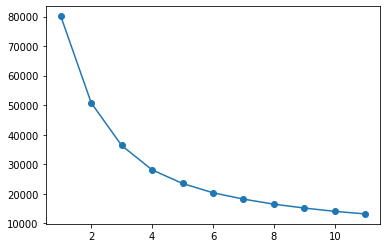

In [31]:
from sklearn.cluster import KMeans
inertias =[]
Krange = range(1,12)

for c in Krange:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(Krange, inertias, marker='o')

In [32]:
n = 5

kmeans = KMeans(n_clusters=n, random_state=42)
labels = kmeans.fit_predict(df_scaled)
df_scaled['Clusters'] = labels

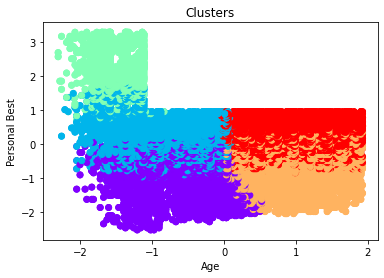

In [33]:
plt.scatter(df_scaled['Age'], df_scaled['Personal Best'], c=df_scaled['Clusters'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Personal Best')
plt.title('Clusters')
plt.show()


In [34]:
df['Clusters'] = labels

In [35]:
df.to_csv('C:\ishan\Capstone\data_100m_model.csv', index=False)